In [1]:
import sys
sys.path.append('../SAMI')

from utils import *
from preprocessing import *
from correlation import *
from clustering import *
from markers import *
from pathway import *
from norm import *
from clustermapping import *

import warnings
warnings.filterwarnings("ignore")


# Data Preprocessing

## Normalization

In [2]:
data_path = '../datasets/'
pattern = r'brain(?!.*norm).*\.csv$'

create_norm_dataset(data_path,pattern)

-----------------------------
Normalization to constant sum 1.
Log2 Transformation.
Scaling: N/A.
brain_lipidomics_norm.csv is created.
-----------------------------
Normalization to constant sum 1.
Log2 Transformation.
Scaling: N/A.
brain_glycomics_norm.csv is created.
-----------------------------
Normalization to constant sum 1.
Log2 Transformation.
Scaling: N/A.
brain_metabolomics_norm.csv is created.


## Convert .csv to .h5ad and split datasets by regions

In [3]:
csv2h5ad(data_path=data_path,pattern=r'^\w+norm\.csv',split=True)

## Pool three omics data

In [4]:
pooldata(data_path=data_path,pattern=r'^\w+norm\.csv',split=True) 

In [5]:
list_files(data_path,'pool','.h5ad')

['brain1ad_pool.h5ad',
 'brain1wt_pool.h5ad',
 'brain2ad_pool.h5ad',
 'brain2wt_pool.h5ad',
 'brain3ad_pool.h5ad',
 'brain3wt_pool.h5ad',
 'brain_pool.h5ad']

# Clustering

## brain1

In [6]:
clusters = Clusters('brain1wt','pool',1)
clusters.clustering()

clusters = Clusters('brain1ad','pool',1)
clusters.clustering()

In [7]:
integration = Cluster_Integration('brain1ad_pool_1.h5ad','brain1wt_pool_1.h5ad')

integration.integrate()

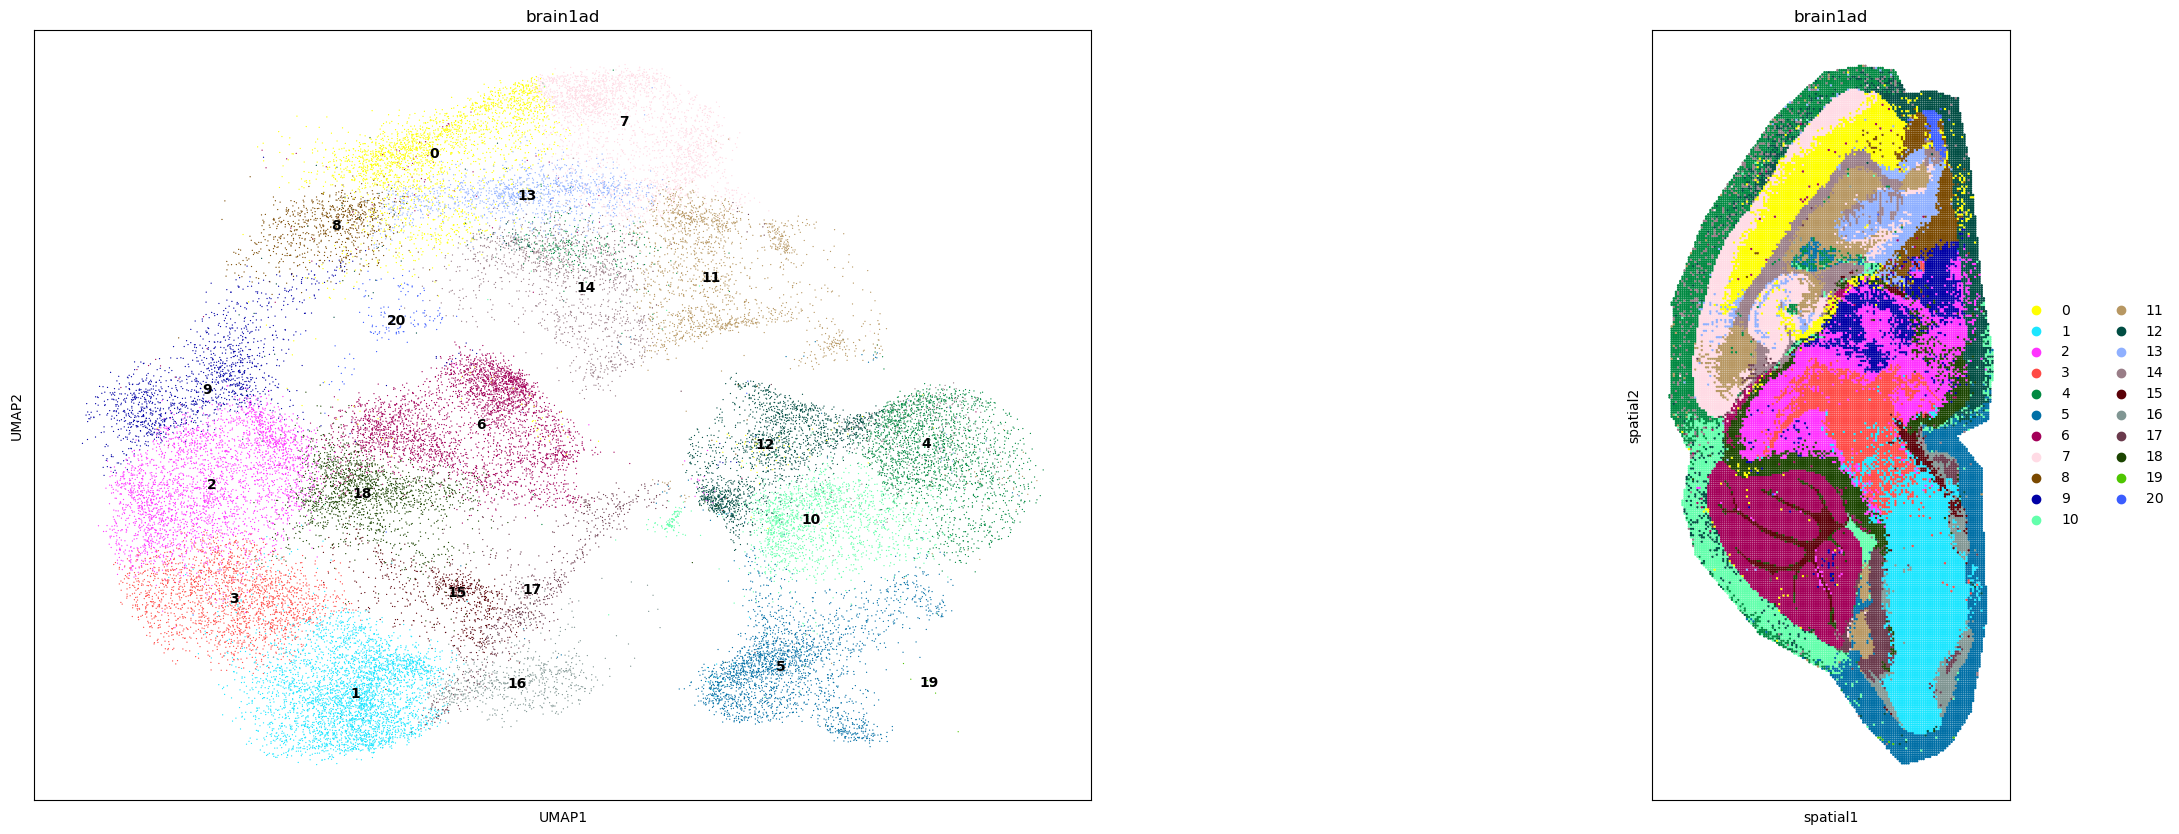

In [8]:
integration.plot_umap_cluster('brain1ad',size=60,show=True)

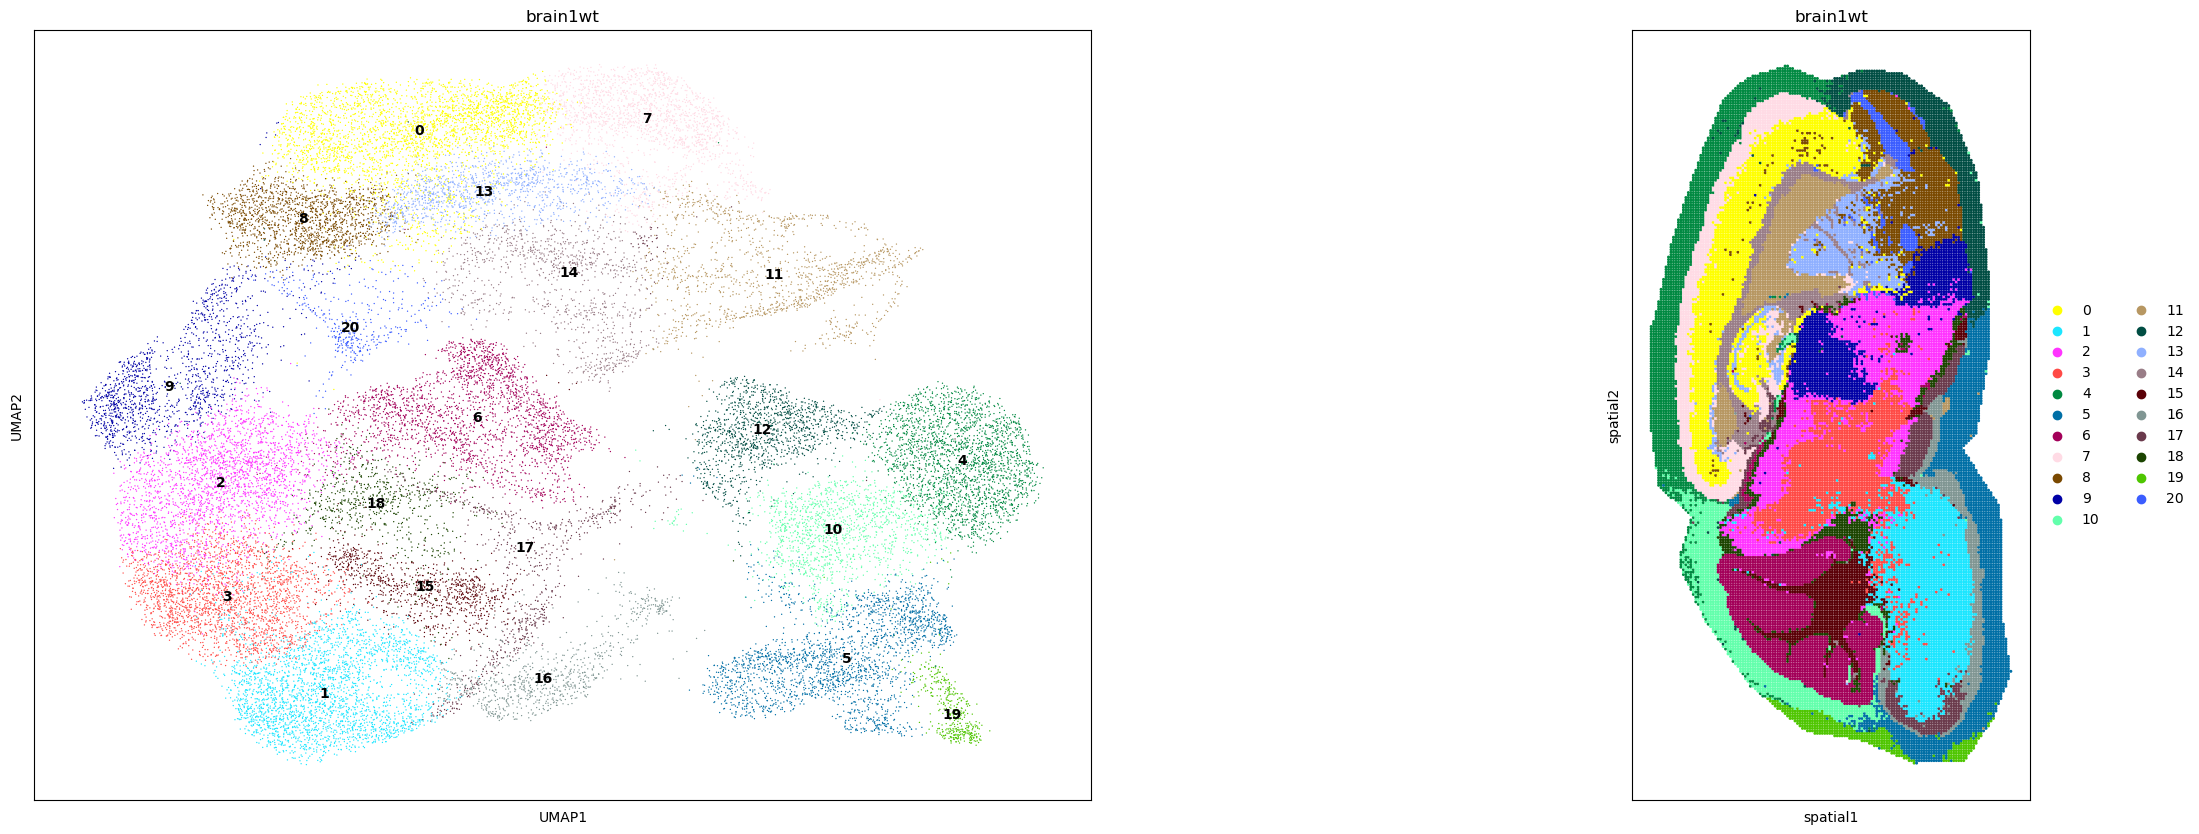

In [9]:
integration.plot_umap_cluster('brain1wt',size=60,show=True)

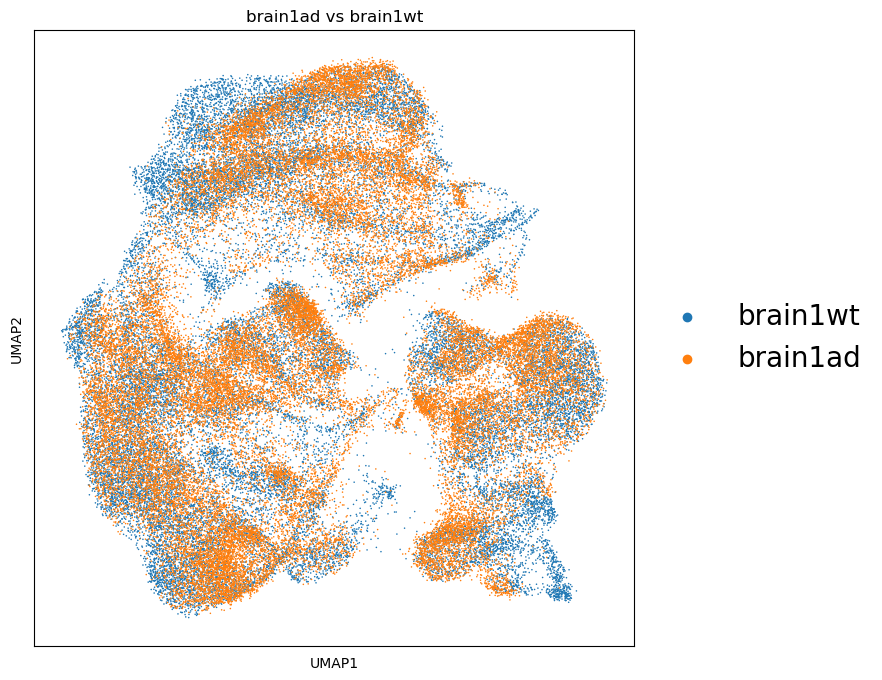

In [10]:
integration.plot_overlap_umap(show=True)

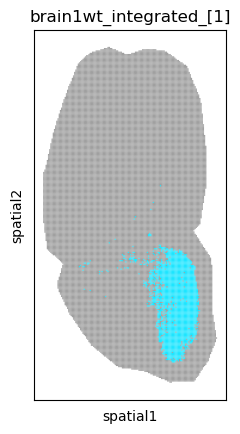

In [11]:
integration.plot_select_cluster('brain1wt',cluster=1, size=60, show=True)

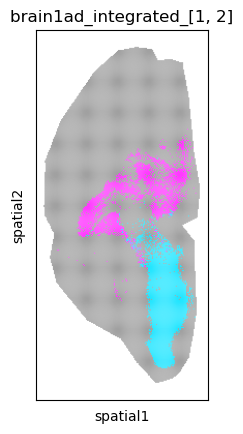

In [12]:
integration.plot_select_cluster('brain1ad',cluster=[1,2], size=60, show=True)

# Markers

In [22]:
adata1 = sc.read('../results/clustering/brain1ad_integrated.h5ad') # case 
adata_filtered1 = adata_filter(adata1,0.1,0.1)

adata2 = sc.read('../results/clustering/brain1wt_integrated.h5ad') # control
adata_filtered2 = adata_filter(adata2,0.1,0.1)

In [23]:
markers = Markers('brain1')

markers.findmarkers(adata=adata_filtered1,adata2=adata_filtered2,adj_pval_cutoff=0.05,top=50)

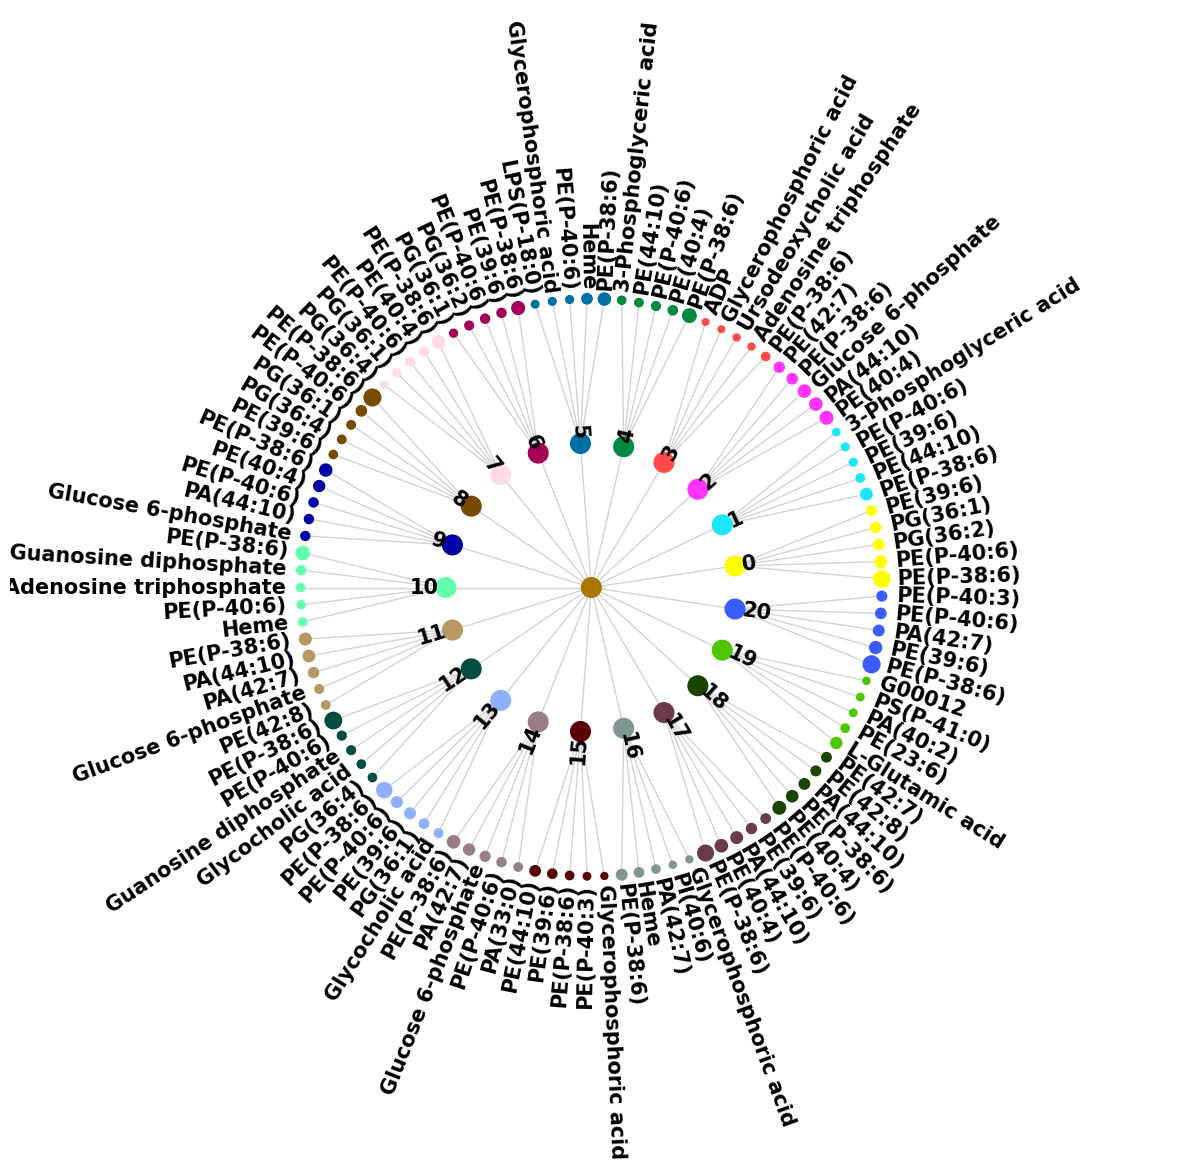

In [25]:
markers.circular_tree(top=5, show=True)

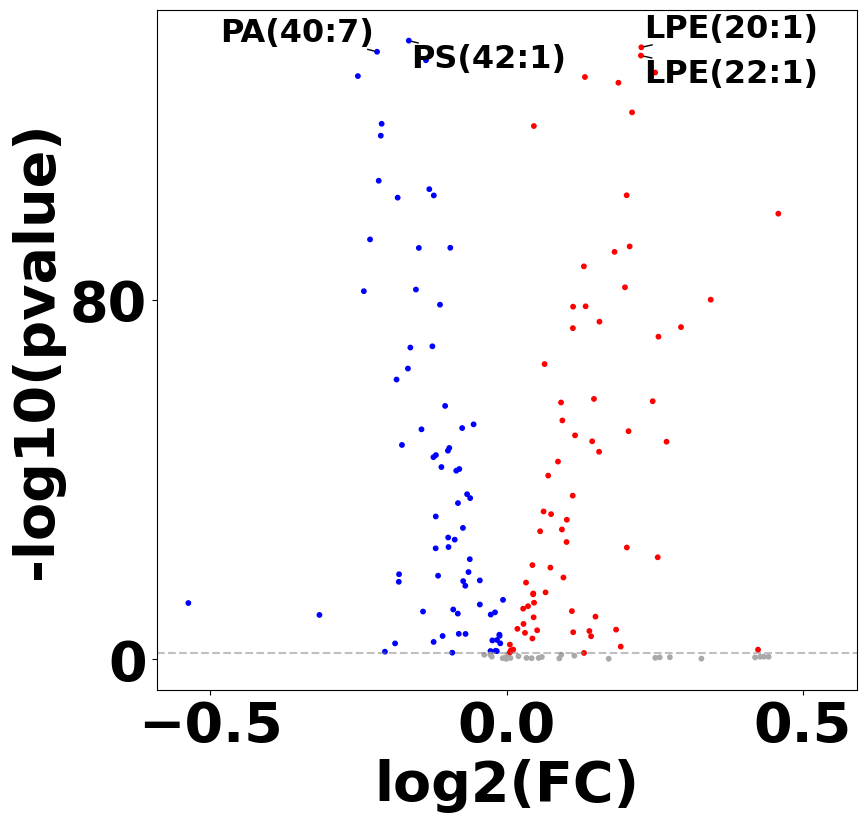

In [26]:
markers.volcano_plot(1, show=True)

# Pathway

In [27]:
pathway = Pathway('brain1','metabolomics')

pathway.findpathway()

Metabolomics and Glycomics are combined for pathway enrichment analysis.
cluster: 0 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 1 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 2 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 3 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
clu

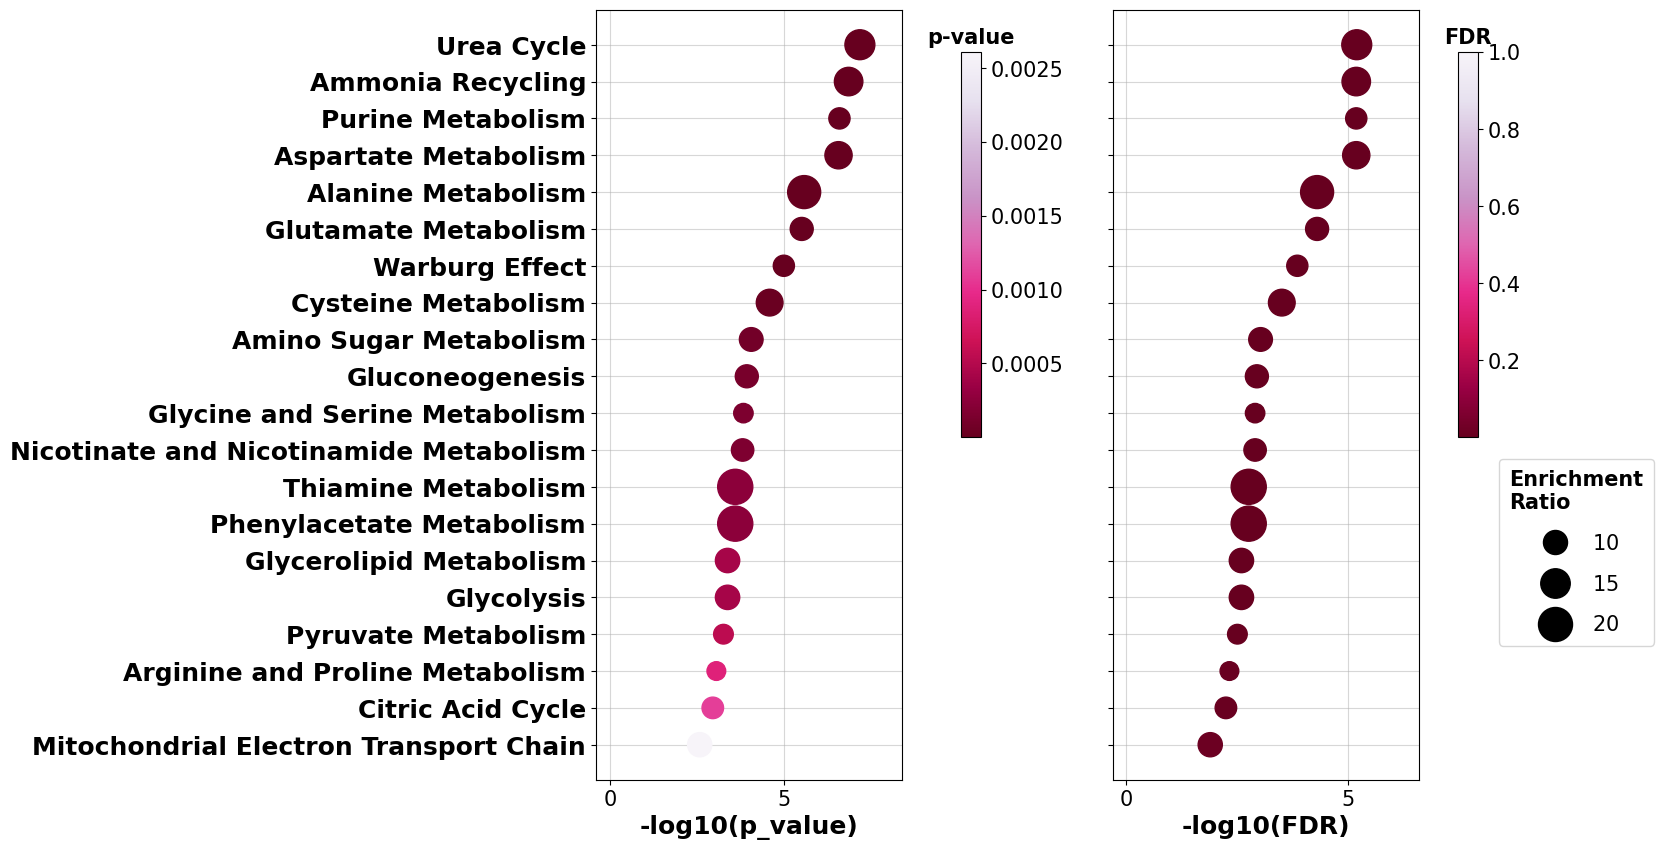

In [28]:
pathway.plot_dot(cluster=1,scale=30,height=10,top=20,show=True)

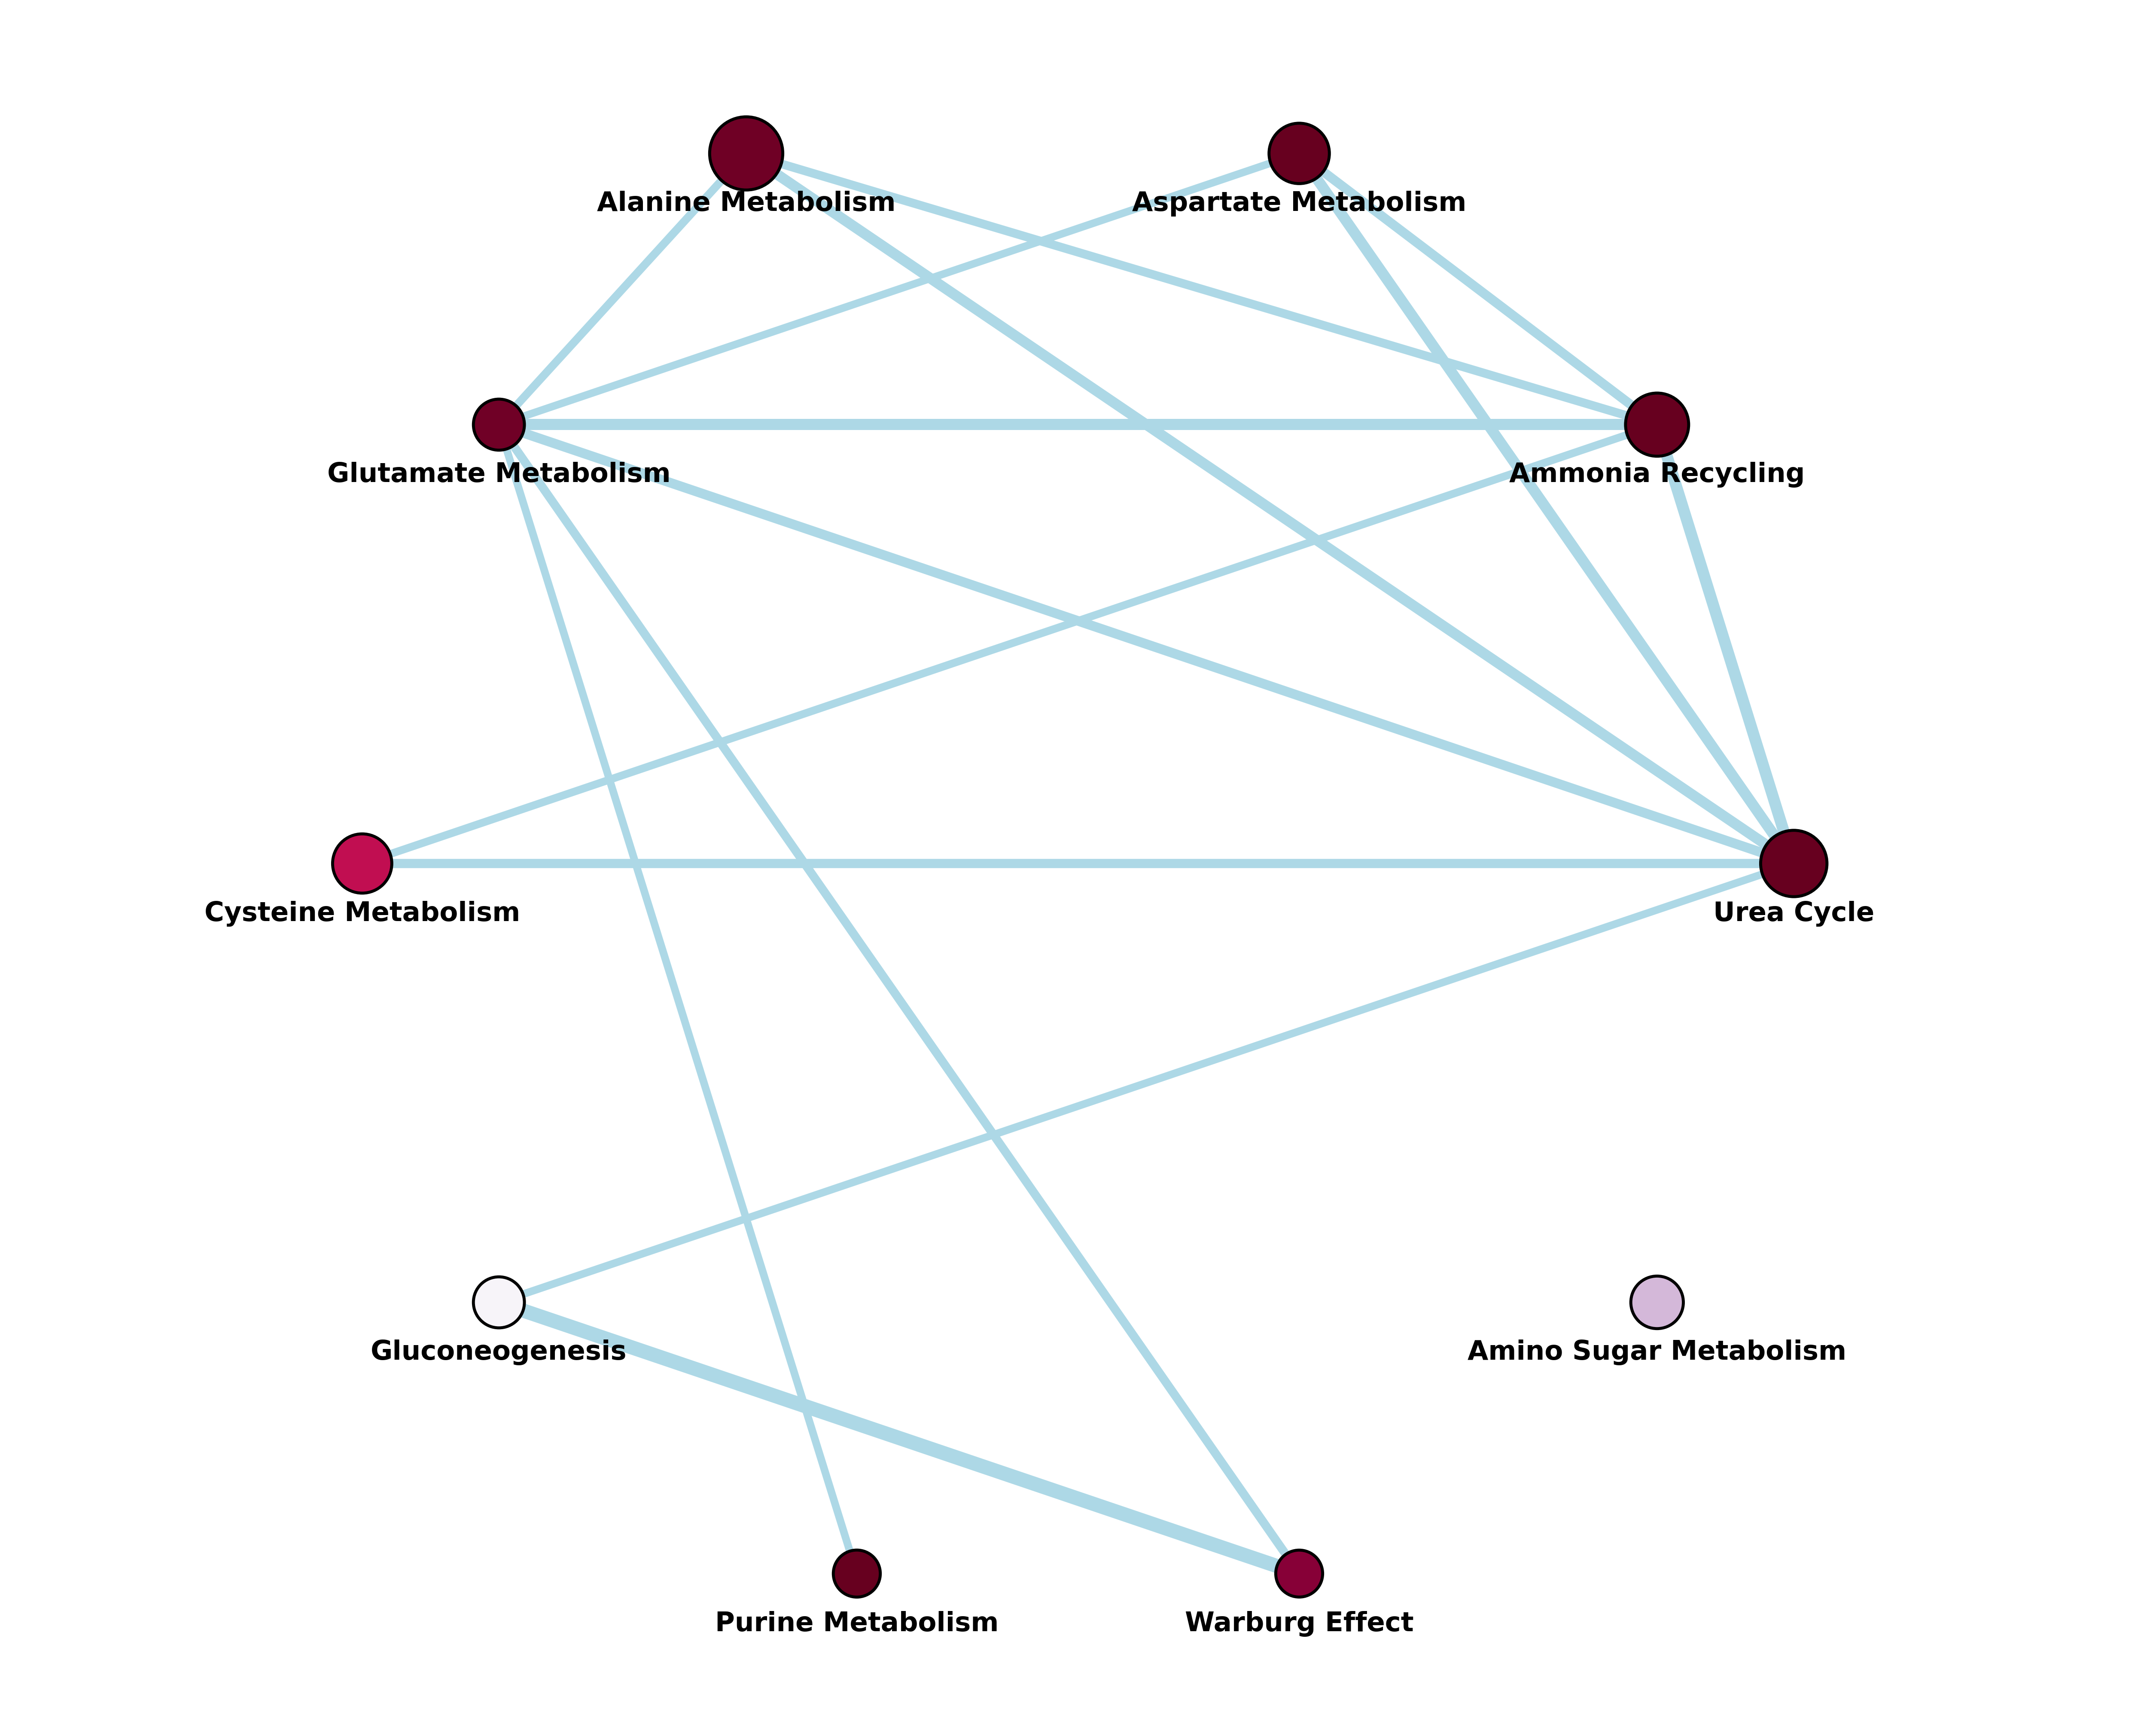

In [29]:
pathway.pathway_network(cluster=1,top=10,show=True)

In [30]:
pathway = Pathway('brain1','lipidomics')

pathway.findpathway()

cluster: 0 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 1 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 2 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 3 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 4 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"          

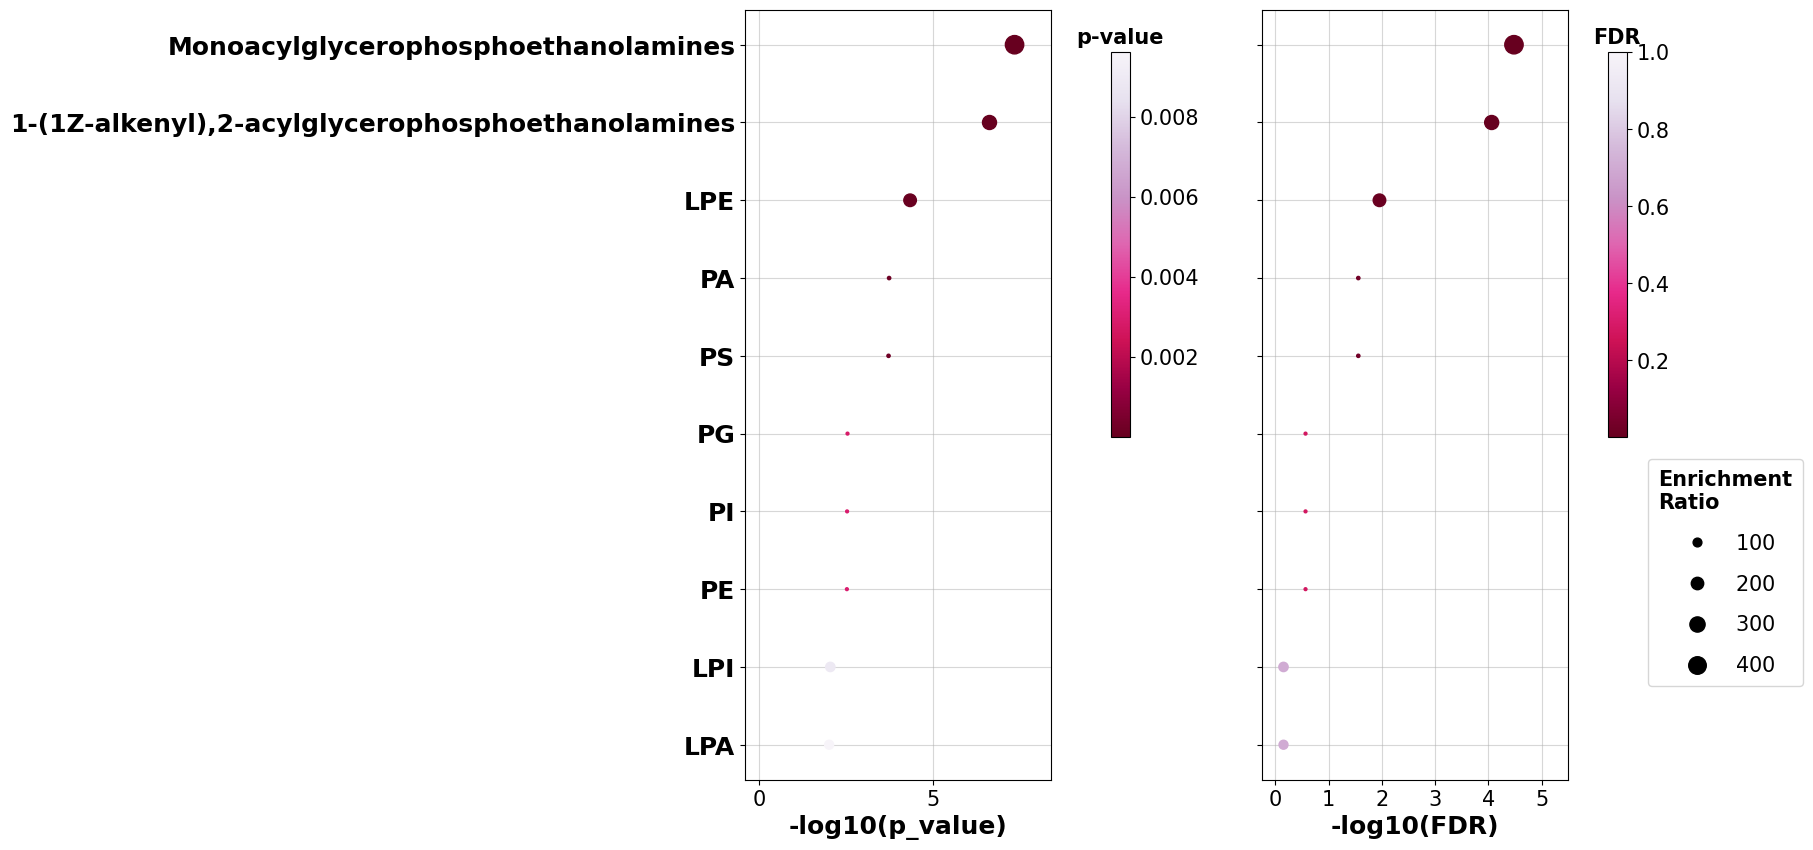

In [32]:
pathway.plot_dot(cluster=1,scale=0.4,height=10,top=10,show=True)